A/B Testing Analysis Results
Control Group:    Mean = 100.29, Std Dev = 14.68
Treatment Group:  Mean = 103.06, Std Dev = 14.95
T-statistic:      -4.1817
P-value:          0.0000
Effect Size:      0.1870

Conclusion: The difference between the control and treatment groups is statistically significant.
The treatment group performed better than the control group.

Effect Size Interpretation:
The effect size is small.


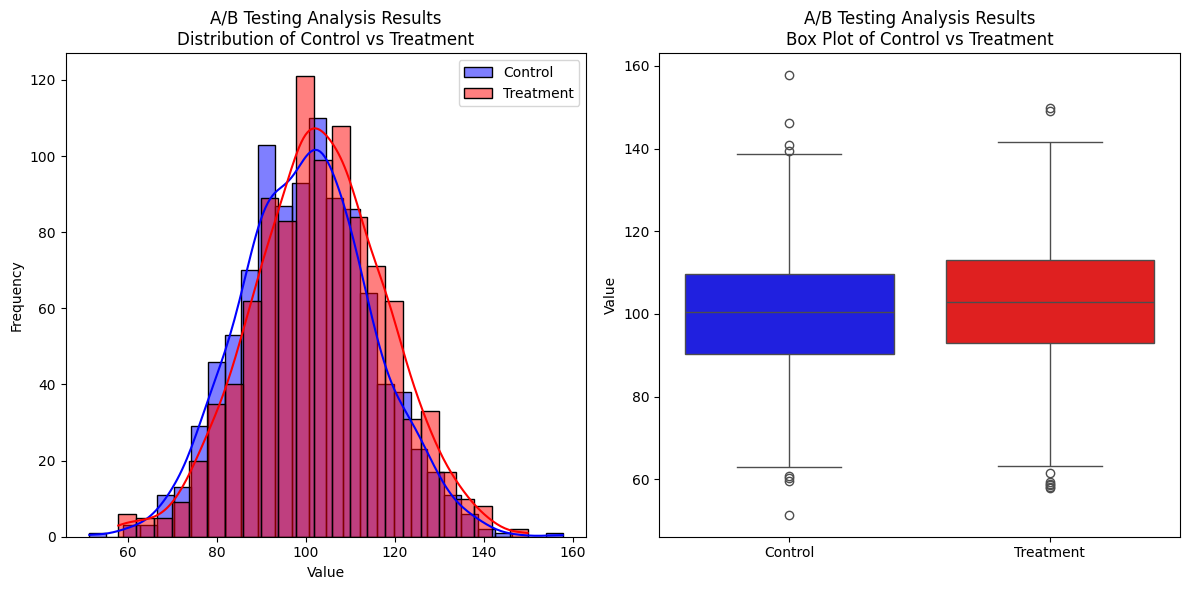

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def generate_sample_data(size, control_mean, treatment_mean, control_std, treatment_std):

    control_data = np.random.normal(control_mean, control_std, size)
    treatment_data = np.random.normal(treatment_mean, treatment_std, size)
    return control_data, treatment_data

def perform_t_test(control_data, treatment_data):

    t_stat, p_value = stats.ttest_ind(control_data, treatment_data)
    return t_stat, p_value

def calculate_effect_size(control_data, treatment_data):

    pooled_std = np.sqrt((np.std(control_data, ddof=1) ** 2 + np.std(treatment_data, ddof=1) ** 2) / 2)
    effect_size = (np.mean(treatment_data) - np.mean(control_data)) / pooled_std
    return effect_size

def plot_results(control_data, treatment_data):

    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=control_data, kde=True, color='blue', alpha=0.5, label='Control')
    sns.histplot(data=treatment_data, kde=True, color='red', alpha=0.5, label='Treatment')
    plt.title('A/B Testing Analysis Results\nDistribution of Control vs Treatment')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=[control_data, treatment_data], palette=['blue', 'red'])
    plt.title('A/B Testing Analysis Results\nBox Plot of Control vs Treatment')
    plt.xticks([0, 1], ['Control', 'Treatment'])
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

def main():
    np.random.seed(42)
    sample_size = 1000
    control_mean, treatment_mean = 100, 102
    control_std, treatment_std = 15, 15
    control_data, treatment_data = generate_sample_data(sample_size, control_mean, treatment_mean, control_std, treatment_std)

    t_stat, p_value = perform_t_test(control_data, treatment_data)

    effect_size = calculate_effect_size(control_data, treatment_data)

    print("A/B Testing Analysis Results")
    print(f"Control Group:    Mean = {np.mean(control_data):.2f}, Std Dev = {np.std(control_data):.2f}")
    print(f"Treatment Group:  Mean = {np.mean(treatment_data):.2f}, Std Dev = {np.std(treatment_data):.2f}")
    print(f"T-statistic:      {t_stat:.4f}")
    print(f"P-value:          {p_value:.4f}")
    print(f"Effect Size:      {effect_size:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("\nConclusion: The difference between the control and treatment groups is statistically significant.")
        if effect_size > 0:
            print("The treatment group performed better than the control group.")
        else:
            print("The control group performed better than the treatment group.")
    else:
        print("\nConclusion: There is no statistically significant difference between the control and treatment groups.")

    print(f"\nEffect Size Interpretation:")
    if abs(effect_size) < 0.2:
        print("The effect size is small.")
    elif abs(effect_size) < 0.5:
        print("The effect size is medium.")
    else:
        print("The effect size is large.")

    plot_results(control_data, treatment_data)

if __name__ == "__main__":
    main()